In [1]:
%load_ext autoreload
%autoreload 2

In [70]:
import scanpy as sc
import numpy as np

In [71]:
from oor_benchmark.api import check_method, sample_dataset

In [72]:
adata = sample_dataset()
adata.obsm["X_scVI"] = adata.obsm["X_pca"].copy()
adata.obs["OOR_state"] = np.where(adata.obs["louvain"] == "B cells", 1, 0)
remove_cells = adata.obs_names[(adata.obs["OOR_state"] == 1) & (adata.obs["dataset_group"] != "query")]
adata = adata[~adata.obs_names.isin(remove_cells)].copy()

In [73]:
from oor_benchmark.methods import _meld

In [74]:
adata = adata[adata.obs['dataset_group'] != 'atlas'].copy()

In [75]:
from oor_benchmark.methods import _meld
_meld.run_meld(adata, query_group = 'query', reference_group='ctrl')

Building graph on 1209 samples and 50 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.09 seconds.
  Calculating affinities...
  Calculated affinities in 0.01 seconds.
Calculated graph and diffusion operator in 0.14 seconds.


In [76]:
adata.obs['meld_prob_query'] = adata.obsm['probability_estimate']['query']

In [92]:
sample_adata = adata.T.copy()
del sample_adata.X
del sample_adata.obs
sample_adata.var['OOR_score'] = sample_adata.var['meld_prob_query']
quant_10perc = np.quantile(sample_adata.var['meld_prob_query'], 0.90)
sample_adata.var["OOR_signif"] = sample_adata.var["OOR_score"] >= quant_10perc
sample_adata.varm["groups"] = np.identity(sample_adata.n_obs)
adata_design.uns['sample_adata'] = sample_adata.copy()

In [101]:
from scipy.sparse import csc_matrix
csc_matrix(np.identity(sample_adata.n_obs))

<1838x1838 sparse matrix of type '<class 'numpy.float64'>'
	with 1838 stored elements in Compressed Sparse Column format>

In [100]:
from anndata import AnnData
AnnData(var = adata.obs)

AnnData object with n_obs × n_vars = 0 × 1209
    var: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cell_annotation', 'sample_id', 'dataset_group', 'OOR_state', 'is_query', 'meld_prob_query'

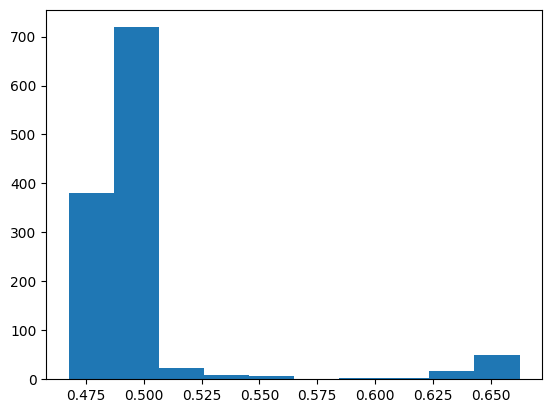

In [85]:
import matplotlib.pyplot as plt
plt.hist(sample_adata.var['meld_prob_query']);


In [103]:
from oor_benchmark.methods.scArches_milo import *

Global seed set to 0
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [106]:
adata = sample_dataset()
adata.obsm["X_scVI"] = adata.obsm["X_pca"].copy()
adata_merge = scArches_atlas_milo_ctrl(adata, annotation_col="louvain", harmonize_output=True)

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)


In [114]:
from oor_benchmark.api import check_method

In [112]:
adata = sample_dataset()

In [113]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cell_annotation', 'sample_id', 'dataset_group'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [110]:
check_method(adata_merge)

AssertionError: 